<a href="https://colab.research.google.com/github/saish15/Machine-Learning/blob/master/Moving_obj2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#set path

from google.colab import drive
drive.mount('/content/drive', force_remount=True)
!ls "/content/drive/My Drive/Required Files"


Mounted at /content/drive
 car.jpg   cars.xml   haarcascade_russian_plate_number.xml  'Ice Car.mp4'


In [2]:
%matplotlib inline
import os
data= os.listdir('../content/drive/My Drive/Required Files')
data

['cars.xml', 'haarcascade_russian_plate_number.xml', 'car.jpg', 'Ice Car.mp4']

In [3]:
import cv2

In [4]:
video = r'../content/drive/My Drive/Required Files/Ice Car.mp4' #source path
video_images = '' #destination path to store images../content/drive/My Drive/Required Files/Required Files/Images_vid

In [5]:
#Capture vido by using open cv video capture library
cap_vid = cv2.VideoCapture(video)
if not cap_vid.isOpened():
    exit(0)

In [6]:
#Capture images per 5 frame
frameFrequency=5

In [9]:
#iterate all frames
total_frame = 0
id = 0
while True:
    ret, frame = cap_vid.read()
    if ret is False:
        break
    total_frame += 1
    if total_frame%frameFrequency == 0:
        id += 1
        image_name = video_images + str(id) +'.jpg'
        cv2.imwrite(image_name, frame)
        print(image_name)
cap_vid.release()



In [21]:
import glob2

g = glob2.glob('../content/drive/My Drive/Required Files/frames/*jpg')
g

['../content/drive/My Drive/Required Files/frames/Images_vid1.jpg',
 '../content/drive/My Drive/Required Files/frames/Images_vid2.jpg',
 '../content/drive/My Drive/Required Files/frames/Images_vid3.jpg',
 '../content/drive/My Drive/Required Files/frames/Images_vid4.jpg',
 '../content/drive/My Drive/Required Files/frames/Images_vid5.jpg',
 '../content/drive/My Drive/Required Files/frames/Images_vid6.jpg',
 '../content/drive/My Drive/Required Files/frames/Images_vid7.jpg',
 '../content/drive/My Drive/Required Files/frames/Images_vid8.jpg',
 '../content/drive/My Drive/Required Files/frames/Images_vid9.jpg',
 '../content/drive/My Drive/Required Files/frames/Images_vid10.jpg',
 '../content/drive/My Drive/Required Files/frames/Images_vid11.jpg',
 '../content/drive/My Drive/Required Files/frames/Images_vid12.jpg',
 '../content/drive/My Drive/Required Files/frames/Images_vid13.jpg',
 '../content/drive/My Drive/Required Files/frames/Images_vid14.jpg',
 '../content/drive/My Drive/Required Files/

In [32]:
import re
# get file names of the frames
col_frames = os.listdir('../content/drive/My Drive/Required Files/frames')

# sort file names
col_frames.sort(key=lambda f: int(re.sub('\D', '', f)))

# empty list to store the frames
col_images=[]

for i in col_frames:
    # read the frames
    img = cv2.imread('../content/drive/My Drive/Required Files/frames/'+i)
    # append the frames to the list
    col_images.append(img)

In [33]:
col_images

[array([[[ 59,  41,  18],
         [ 59,  41,  18],
         [ 60,  42,  19],
         ...,
         [229, 239, 255],
         [229, 239, 255],
         [229, 239, 255]],
 
        [[ 59,  41,  18],
         [ 59,  41,  18],
         [ 60,  42,  19],
         ...,
         [229, 239, 255],
         [229, 239, 255],
         [229, 239, 255]],
 
        [[ 59,  41,  18],
         [ 59,  41,  18],
         [ 60,  42,  19],
         ...,
         [229, 239, 255],
         [229, 239, 255],
         [229, 239, 255]],
 
        ...,
 
        [[ 29,  38,  35],
         [ 31,  40,  37],
         [ 20,  29,  26],
         ...,
         [ 49,  43,  32],
         [ 50,  44,  33],
         [ 51,  45,  34]],
 
        [[ 34,  43,  40],
         [ 25,  34,  31],
         [ 15,  24,  21],
         ...,
         [ 41,  35,  24],
         [ 41,  35,  24],
         [ 40,  34,  23]],
 
        [[ 39,  48,  45],
         [ 22,  31,  28],
         [ 16,  25,  22],
         ...,
         [ 38,  32,  21],
  

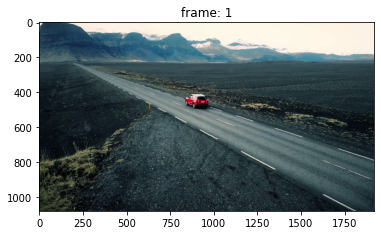

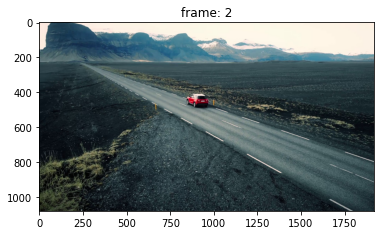

In [50]:
# plot 1st frame
i = 1

for frame in [i, i+1]:
    plt.imshow(cv2.cvtColor(col_images[frame], cv2.COLOR_BGR2RGB))
    plt.title("frame: "+str(frame))
    plt.show()

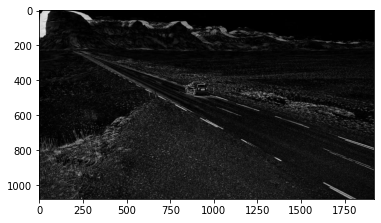

In [51]:
# convert the frames to grayscale
gray1 = cv2.cvtColor(col_images[i], cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(col_images[i+1], cv2.COLOR_BGR2GRAY)

# plot the image after frame differencing
plt.imshow(cv2.absdiff(gray2, gray1), cmap = 'gray')
plt.show()

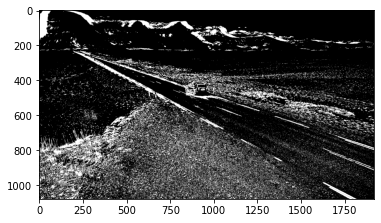

In [74]:
thr_img = cv2.absdiff(gray2, gray1)

# perform image thresholding
ret, thresh = cv2.threshold(thr_img, 30, 255, cv2.THRESH_BINARY)

# plot image after thresholding
plt.imshow(thresh, cmap = 'gray')
plt.show()

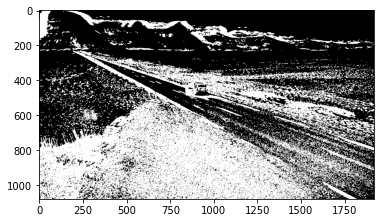

In [53]:
import numpy as np
# apply image dilation
kernel = np.ones((3,3),np.uint8)
dilated = cv2.dilate(thresh,kernel,iterations = 1)

# plot dilated image
plt.imshow(dilated, cmap = 'gray')
plt.show()

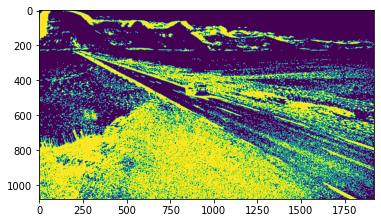

In [54]:
# plot vehicle detection zone
plt.imshow(dilated)
cv2.line(dilated, (0, 80),(256,80),(100, 0, 0))
plt.show()

In [55]:
# find contours
contours, hierarchy = cv2.findContours(thresh.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

In [56]:
valid_cntrs = []

for i,cntr in enumerate(contours):
    x,y,w,h = cv2.boundingRect(cntr)
    if (x <= 200) & (y >= 80) & (cv2.contourArea(cntr) >= 25):
        valid_cntrs.append(cntr)

# count of discovered contours        
len(valid_cntrs)

152

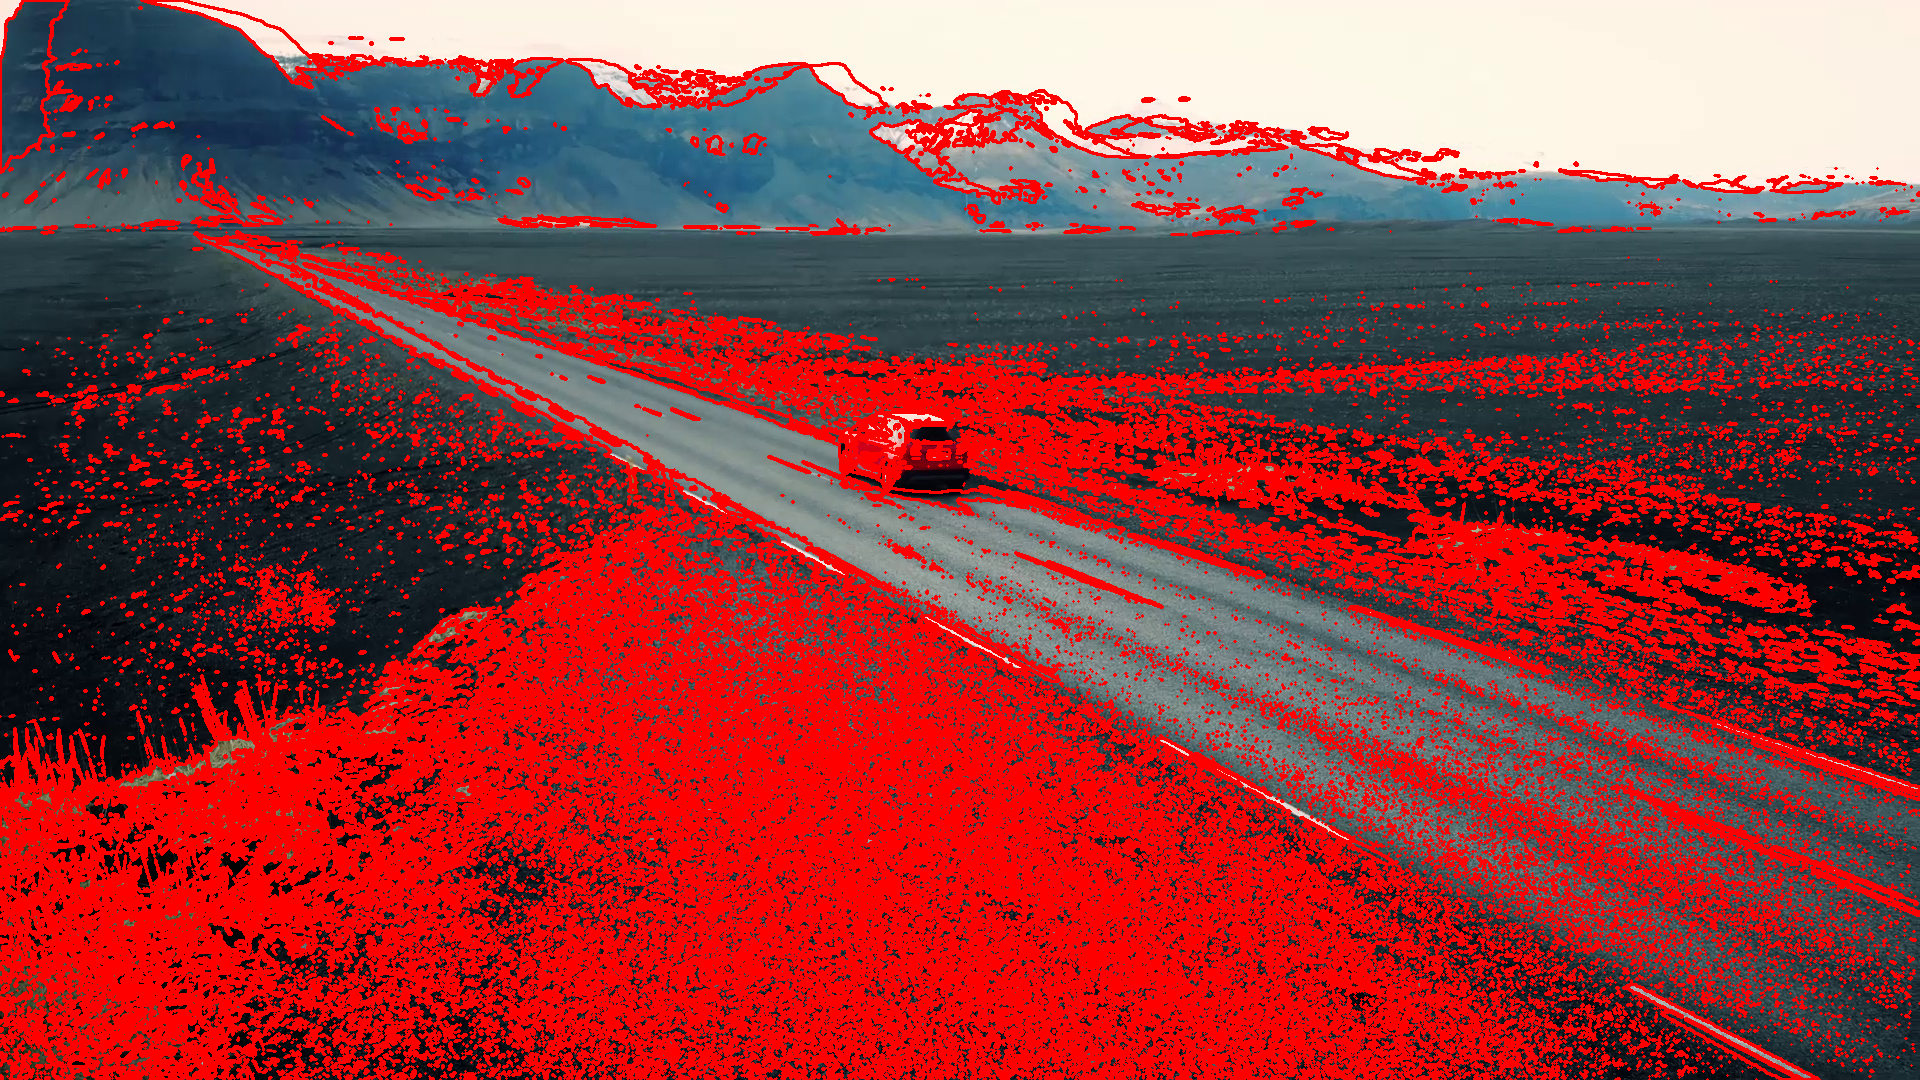

-1

In [73]:
import cv2 as cv
from google.colab.patches import cv2_imshow
imag = col_images[1].copy()

#draw contours on image
cv.drawContours(imag, contours, -1, (0,0,255), 2)
#show contours outlining on image
cv2_imshow(imag)

#wait till infinity
cv.waitKey(0)

In [ ]:
from google.colab.patches import cv2_imshow
def detect_cars(frame):
    cars = cars_cascade.detectMultiScale(frame, 1.15, 4)
    for (x, y, w, h) in cars:
        cv2.rectangle(frame, (x, y), (x+w,y+h), color=(0, 255, 0), thickness=2)
    return frame

def Simulator():
    CarVideo = cv2.VideoCapture('../content/drive/My Drive/Required Files/Ice Car.mp4')
    while CarVideo.isOpened():
        ret, frame = CarVideo.read()
        controlkey = cv2.waitKey(1)
        if ret:        
            cars_frame = detect_cars(frame)
            cv2_imshow(cars_frame)
        else:
            break
        if controlkey == ord('q'):
            break

    CarVideo.release()
    cv2.destroyAllWindows()
    
if __name__ == '__main__':
    Simulator()